In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
#Question 1(a) Linear regression model and prediction on test data
def estimate_coef(X, y):
    xtx = np.dot(X.T, X) ## x-transpose times x
    det_xtx = np.linalg.det(xtx)
    val = 0
    if det_xtx == 0:
        print('hello')
    if det_xtx!=0:
        inv_xtx = np.linalg.inv(xtx) ## inverse of x-transpose times x
        xty = np.dot(X.T, y) ## x-transpose times y
        val = np.dot(inv_xtx, xty)
    return val
    

In [3]:
def mean_squared_error(y_pred,y):
    length = y_pred.shape[0]
    sum_error = 0
    for i in range(length):
        sum_error = sum_error + ((y_pred[i] - y[i])**2)
    return sum_error

In [4]:
def regression_fit(arr, degree = 11):
    # estimating coefficients
    length = arr.shape[0]
    x = np.zeros((length,1))
    y = np.zeros((length,1))
    x_power = np.ones((length,degree)) #j denotes (j+1)th power of x

    for i in range(length):
            x[i] = arr[i,0]
            y[i] = arr[i,1] 
    x_power[:,0] = arr[:,0]
    
    #Taking upto 12 power terms of x
    for j in range(1,degree):
        x_power[:,j] = x_power[:,j-1] * arr[:,0]
        j = j+1
    array_squared_err = np.zeros((degree,1))
    array_squared_err[0],array_squared_err[1] = 11000,11000 #Putting dummy values,as these indexes needs to be ignored
    for k in range(2,degree): 
        X = np.c_[np.ones(x.shape[0])]
        for j in range(k):
            X = np.c_[X,x_power[:,j]]
        if j == 11:
            print(X)
    
    b = estimate_coef(X, y)
        #print(b.shape,X.shape)
    y_pred = np.matmul(X,b)
    
    # plotting regression curve
    # plotting the actual points as scatter plot
    plt.scatter(arr[:,0], arr[:,1], color = "m",marker = "o", s = 30)
    # plotting the regression line
    plt.plot(arr[:,0], y_pred, color = "g")
 
    # putting labels
    plt.xlabel('x')
    plt.ylabel('y: actual output')
    
    # function to show plot
    plt.show()
    return y_pred,b,degree


In [5]:
def predict(data_to_predict,parameter,model):
    print(model)
    length = data_to_predict.shape[0]
    ###print(length)
    x = np.zeros((length,1))
    y_hat = np.zeros((length,1))
    x_power1 = np.ones((length,model)) #j denotes (j+1)th power of x
    x_power1[:,0] = data_to_predict[:,0]
    #Taking upto model power terms of x
    for i in range(length):
        x[i] = data_to_predict[i,0]
    for j in range(1,model):
        x_power1[:,j] = x_power1[:,j-1] * x[:,0]
        #y_hat[i] = parameter[0] + parameter[1] * x[i] + parameter[2] * x[i]*x[i] + parameter[3]*x[i]*x[i]*x[i]
    X = np.c_[np.ones(x.shape[0])]
    for j in range(model-1):
        X = np.c_[X,x_power1[:,j]]
    y_hat = np.matmul(X,parameter)
    return y_hat   

In [6]:
def main():
    # observations / training data
    url = 'linear_reg_train_data.csv'
    dataset = pd.read_csv(url)
    arr = dataset.to_numpy()
    
    y_pred,b,model = regression_fit(arr,11)
    #print(b,model)
    url_test = 'linear_reg_test_data.csv'
    dataset_test = pd.read_csv(url_test)
    arr_test = dataset_test.to_numpy()
    y_pred_1 = predict(arr_test,b,model)
    np.savetxt('Question1_parta_test',y_pred_1,delimiter=',')
    print('loss in test prediction:',mean_squared_error(y_pred_1,arr_test[:,1]))
    y_pred_2 = predict(dataset.to_numpy(),b,model)
    np.savetxt('Question1_parta_training',y_pred_2,delimiter=',')
    print('loss in training data prediction:',mean_squared_error(y_pred_2,arr[:,1]))
    # create figure
    fig = plt.figure(figsize=(10, 7))
   # setting values to rows and column variables
    rows = 1
    columns = 2
    # Adds a subplot at the 1st position
    fig.add_subplot(rows, columns, 1)
    # showing image
    plt.scatter(arr_test[:,0], y_pred_1, color = "m", marker = "o", s = 30)
    plt.scatter(arr_test[:,0], arr_test[:,1], color = "b", marker = "o", s = 30)
    
    # Adds a subplot at the 2nd position
    fig.add_subplot(rows, columns, 2)
    plt.scatter(arr[:,0], y_pred_2, color = "m", marker = "o", s = 30)
    plt.scatter(arr[:,0], arr[:,1], color = "b", marker = "o", s = 30)

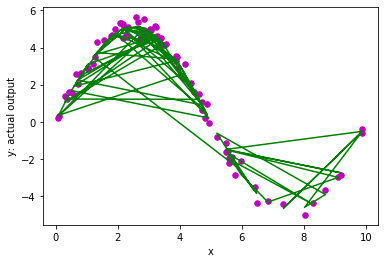

[[-7.06086438e-02]
 [ 4.50997251e+00]
 [-3.43208131e+00]
 [ 3.59226403e+00]
 [-2.29197362e+00]
 [ 8.41087759e-01]
 [-1.93200845e-01]
 [ 2.82322629e-02]
 [-2.53324510e-03]
 [ 1.26643899e-04]
 [-2.69246465e-06]] 11
11
loss in test prediction: [16.79096222]
11
loss in training data prediction: [8.02988841]


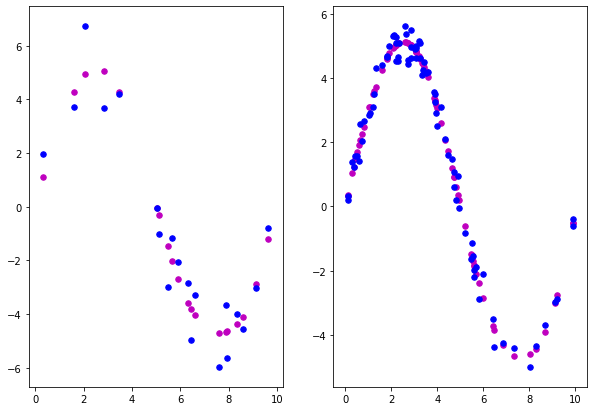

In [7]:
if __name__ == "__main__":
    main()

In [226]:
#best curve fitting is at degree 11 
#loss in test prediction: [0.83954811]
#loss in training data prediction: [0.10037361]

# Question 1(b) Linear regression model and overfitting the data

In [227]:
#Overfitting happens at degree 12 
# You can change the value of degree in the regression_fit function in order to check the curve fitting

In [228]:
#12
#loss in test prediction: [0.92939756]

#loss in training data prediction: [0.13445598]
#below code is repetition of main method of above to show the overfitting curve

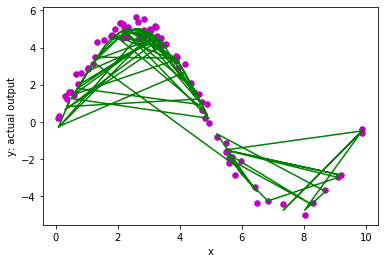

[[-9.86341380e-01]
 [ 8.62727666e+00]
 [-1.58645284e+01]
 [ 2.14705453e+01]
 [-1.62775025e+01]
 [ 7.41249454e+00]
 [-2.15076584e+00]
 [ 4.06530529e-01]
 [-4.97815441e-02]
 [ 3.80389323e-03]
 [-1.64728903e-04]
 [ 3.08568099e-06]]
12
loss in test prediction: [18.58795113]
12
loss in training data prediction: [10.75647872]


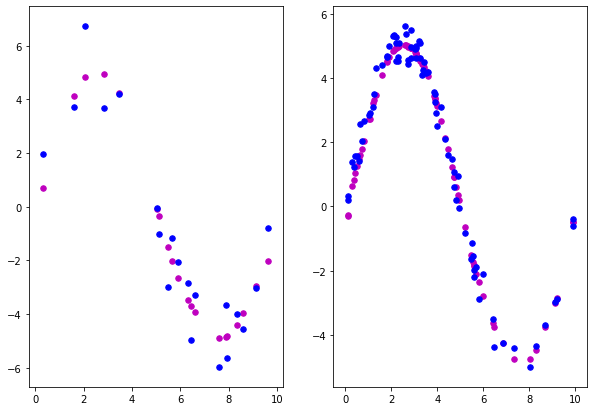

In [10]:
url = 'linear_reg_train_data.csv'
dataset = pd.read_csv(url)
arr = dataset.to_numpy()
y_pred,b,model = regression_fit(arr,12)

print(b)

url_test = 'linear_reg_test_data.csv'
dataset_test = pd.read_csv(url_test)
arr_test = dataset_test.to_numpy()
#### print(arr)
y_pred_1 = predict(arr_test,b,model)
np.savetxt('Question1_partb_test',y_pred_1,delimiter=',')
print('loss in test prediction:',mean_squared_error(y_pred_1,arr_test[:,1]))
y_pred_2 = predict(dataset.to_numpy(),b,model)
np.savetxt('Question1_partb_training',y_pred_2,delimiter=',')
print('loss in training data prediction:',mean_squared_error(y_pred_2,arr[:,1]))


# create figure
fig = plt.figure(figsize=(10, 7))
# setting values to rows and column variables
rows = 1
columns = 2
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
# showing image
plt.scatter(arr_test[:,0], y_pred_1, color = "m", marker = "o", s = 30)
plt.scatter(arr_test[:,0], arr_test[:,1], color = "b", marker = "o", s = 30)
    
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
plt.scatter(arr[:,0], y_pred_2, color = "m", marker = "o", s = 30)
plt.scatter(arr[:,0], arr[:,1], color = "b", marker = "o", s = 30)

# Question 1(c) Ridge regression to solve overfitting

In [11]:
def estimate_coef_Using_ridge(X, y,lambda_r = 1.2):
    xtx = np.dot(X.T, X) ## x-transpose times x
    I = np.identity(xtx.shape[0])
    mat = xtx + (lambda_r * I)
    det_xtx = np.linalg.det(mat)
    val = 0
    if det_xtx!=0:
        inv_mat = np.linalg.inv(mat) ## inverse of x-transpose times x
        xty = np.dot(X.T, y) ## x-transpose times y
        val = np.dot(inv_mat, xty)
    return val

In [12]:
def regression_fit_ridge(arr, degree = 12,lambda_r = 1.2):
    # estimating coefficients
    length = arr.shape[0]
    x = np.zeros((length,1))
    y = np.zeros((length,1))
    x_power = np.ones((length,degree)) #j denotes (j+1)th power of x

    for i in range(length):
            x[i] = arr[i,0]
            y[i] = arr[i,1] 
    x_power[:,0] = arr[:,0]
    
    #Taking upto 12 power terms of x
    for j in range(1,degree):
        x_power[:,j] = x_power[:,j-1] * arr[:,0]
        j = j+1
    array_squared_err = np.zeros((degree,1))
    array_squared_err[0],array_squared_err[1] = 11000,11000 #Putting dummy values,as these indexes needs to be ignored
    for k in range(2,degree): 
        X = np.c_[np.ones(x.shape[0])]
        for j in range(k):
            X = np.c_[X,x_power[:,j]]
        if j == 11:
            print(X)
    
    b = estimate_coef_Using_ridge(X, y,lambda_r)
   # print(b)
    y_pred = np.matmul(X,b)
    
    # plotting regression curve
    # plotting the actual points as scatter plot
    plt.scatter(arr[:,0], arr[:,1], color = "m",marker = "o", s = 30)
    # plotting the regression line
    plt.plot(arr[:,0], y_pred, color = "g")
 
    # putting labels
    plt.xlabel('x')
    plt.ylabel('y: actual output')
    
    # function to show plot
    plt.show()
    return y_pred,b,degree


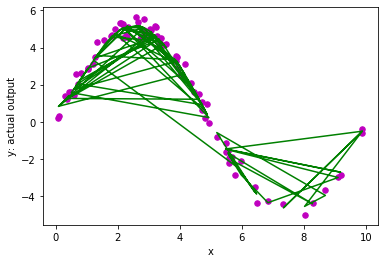

[9.04192877]


In [13]:
# observations / training data
url = 'linear_reg_train_data.csv'
dataset = pd.read_csv(url)
arr = dataset.to_numpy()
y_pred,b,model = regression_fit_ridge(arr,12,0.9)
#print(b)
print(mean_squared_error(y_pred,arr[:,1]))

12
loss in test prediction: [16.68446488]
12
loss in training data prediction: [9.04192877]


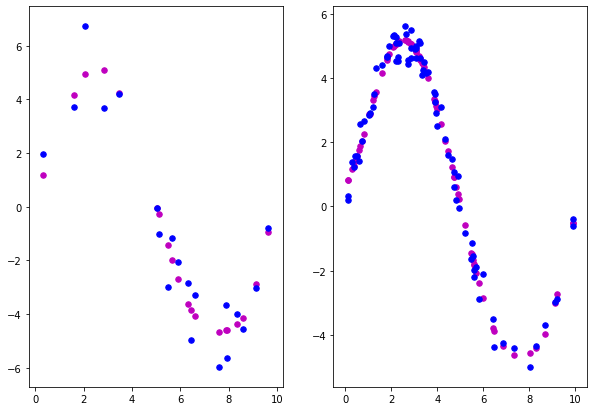

In [15]:
url_test = 'linear_reg_test_data.csv'
dataset_test = pd.read_csv(url_test)
arr_test = dataset_test.to_numpy()
y_pred_1 = predict(arr_test,b,model)
np.savetxt('Question1_partc_test',y_pred_1,delimiter=',')
print('loss in test prediction:',mean_squared_error(y_pred_1,arr_test[:,1]))

y_pred_2 = predict(dataset.to_numpy(),b,model)
np.savetxt('Question1_partc_training',y_pred_2,delimiter=',')
print('loss in training data prediction:',mean_squared_error(y_pred_2,arr[:,1]))


# create figure
fig = plt.figure(figsize=(10, 7))
# setting values to rows and column variables
rows = 1
columns = 2
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
# showing image
plt.scatter(arr_test[:,0], y_pred_1, color = "m", marker = "o", s = 30)
plt.scatter(arr_test[:,0], arr_test[:,1], color = "b", marker = "o", s = 30)
    
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
plt.scatter(arr[:,0], y_pred_2, color = "m", marker = "o", s = 30)
plt.scatter(arr[:,0], arr[:,1], color = "b", marker = "o", s = 30)